In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Selecting the features and target
X = data[['LotArea']]  # Independent variable
y = data['SalePrice']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Creating a Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Fit the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Making predictions
y_pred_scaled = model.predict(X_test_scaled).flatten()

# Transforming predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")


Saving house price dataset.csv to house price dataset.csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean squared error: 6092868407.38
R^2 score: 0.21


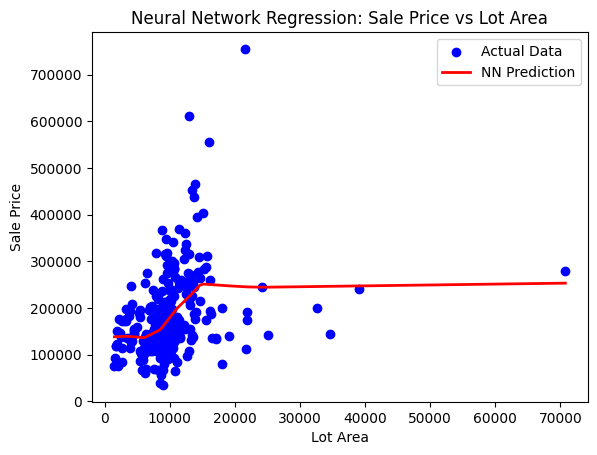

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the test data and predictions for better visualization
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_test_sorted = y_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the test data
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='NN Prediction')

# Adding labels and title
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Neural Network Regression: Sale Price vs Lot Area')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
